In [70]:
import torch
from PIL import Image
from transformers import AutoProcessor, AutoModel
import matplotlib.pyplot as plt
import os
from pillow_heif import register_heif_opener
register_heif_opener()

processor = AutoProcessor.from_pretrained("facebook/metaclip-b32-400m")
model = AutoModel.from_pretrained("facebook/metaclip-b32-400m")

In [71]:
def process_image(image_path):
    # Load the image
    image = Image.open(image_path)

    # Process the text and image inputs
    inputs = processor(text=["mandarin sliced", "mandarin full"], images=image, return_tensors="pt", padding=True)

    with torch.no_grad():
        # Get predictions from the model
        outputs = model(**inputs)
        logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
        text_probs = logits_per_image.softmax(dim=-1)

    return image, text_probs

In [72]:
# Path to the folder containing images
folder_path = "C:\Dev\CuttingCV\images\oranges\Orange_sliced"

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]


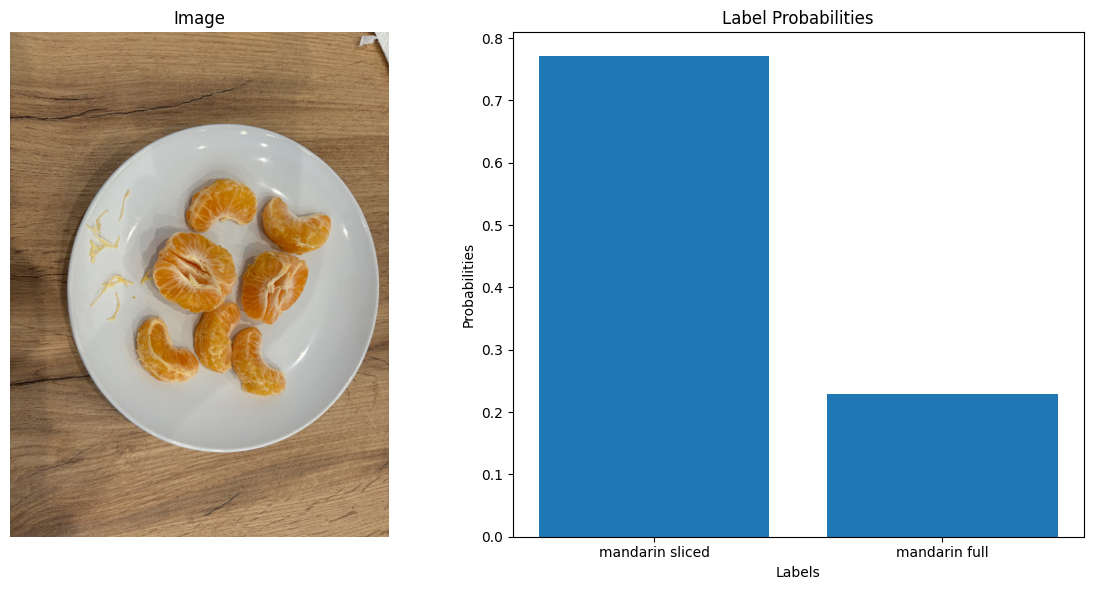

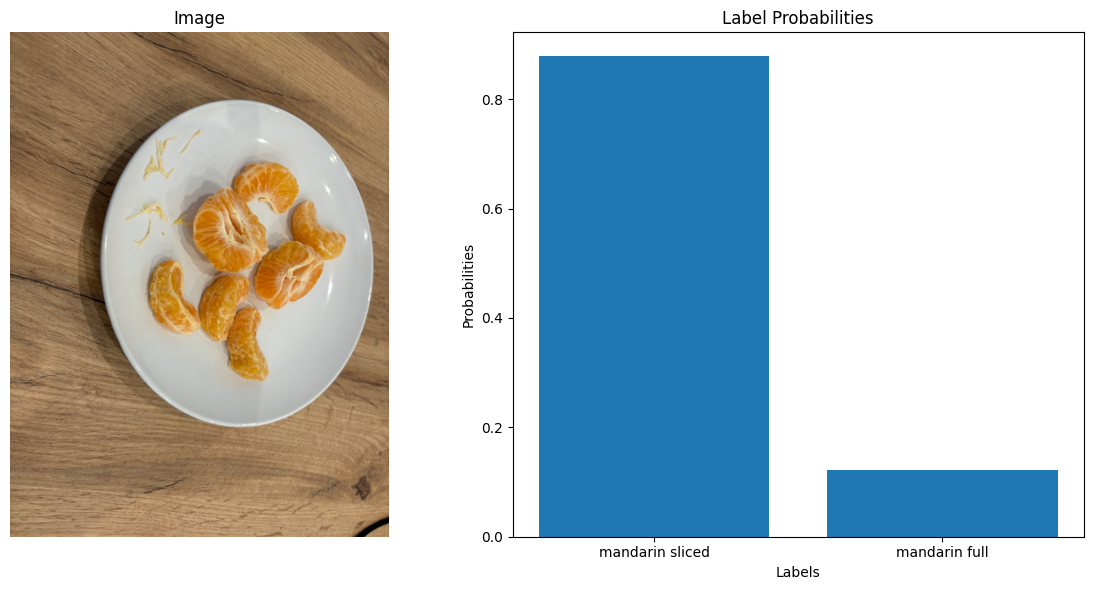

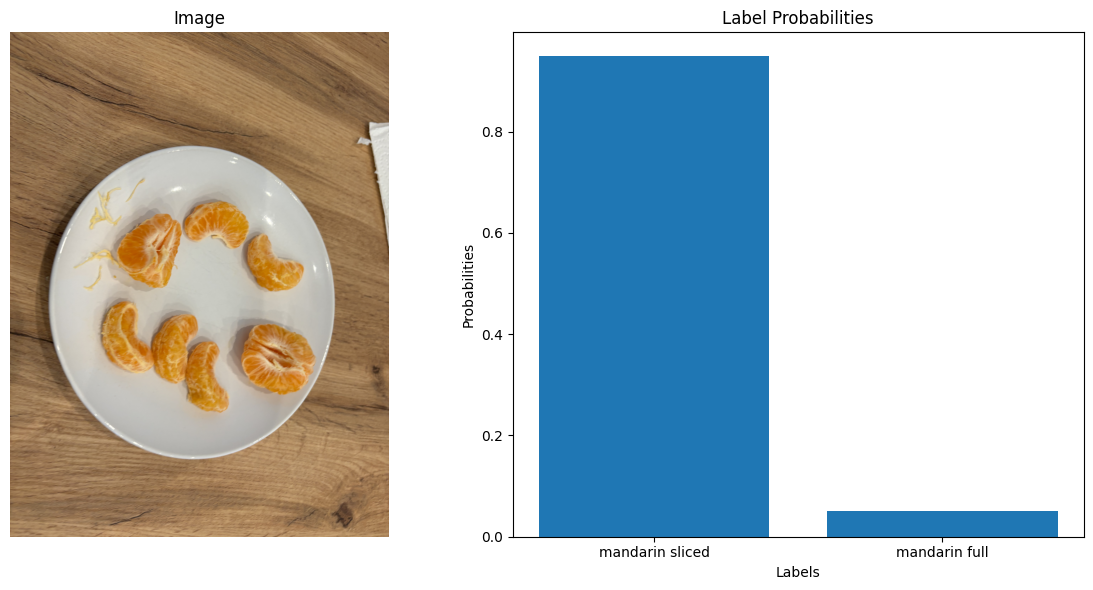

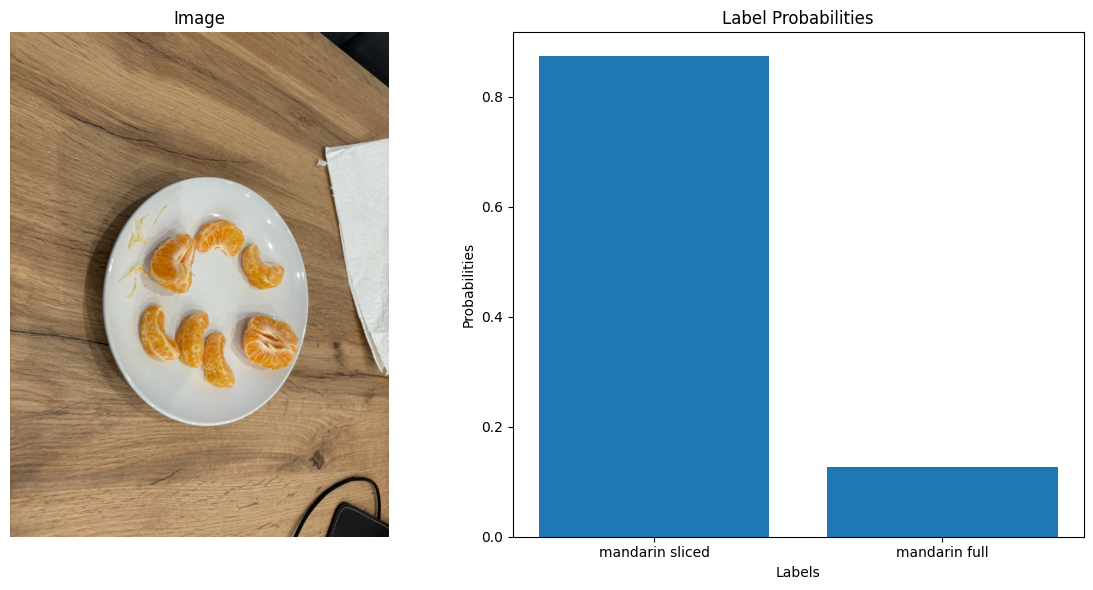

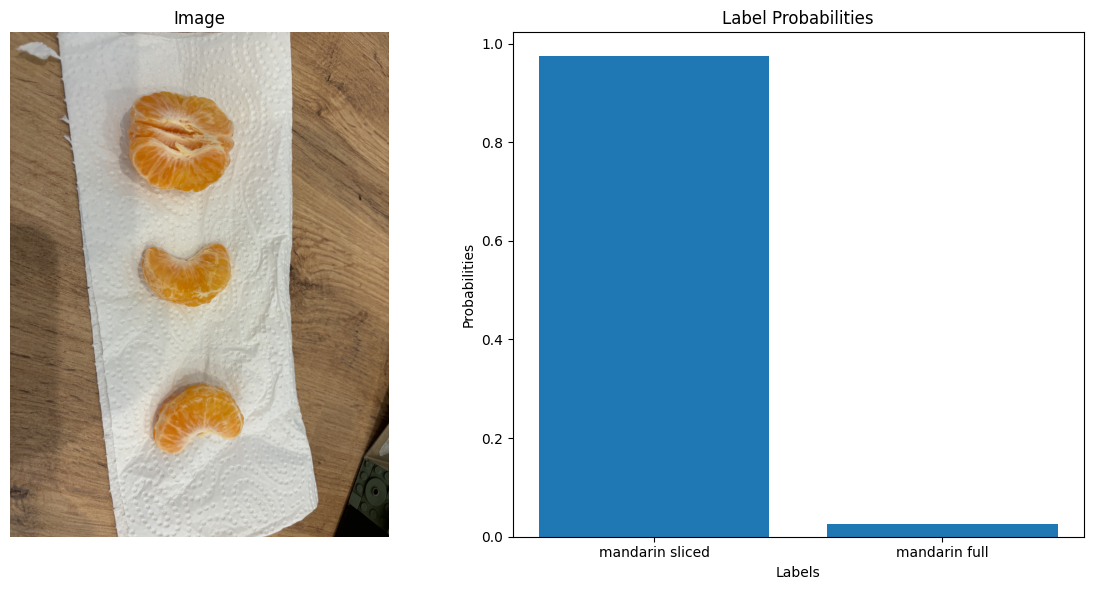

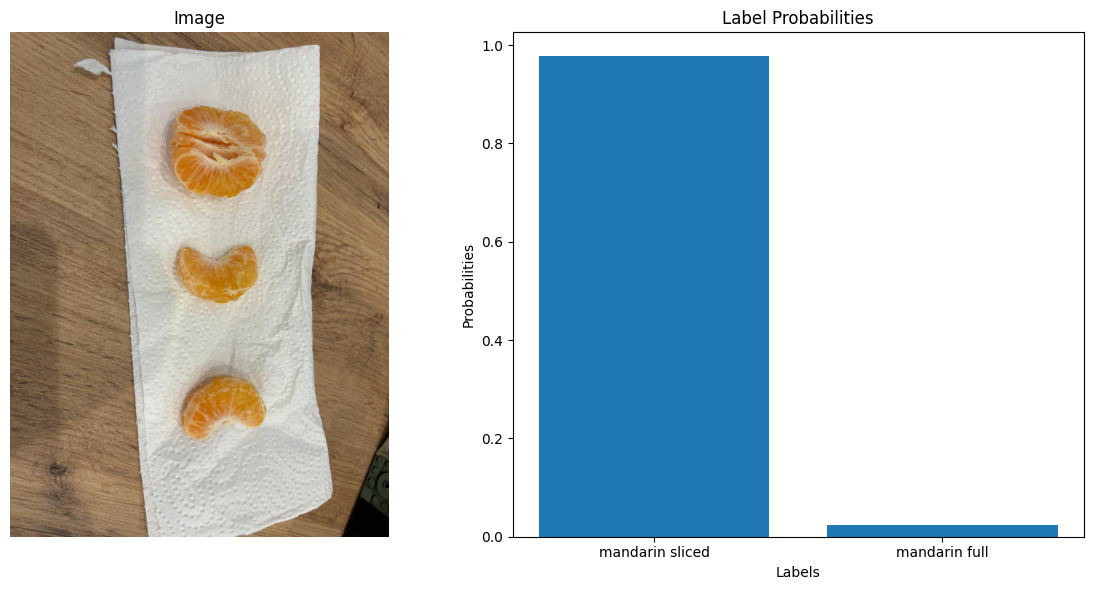

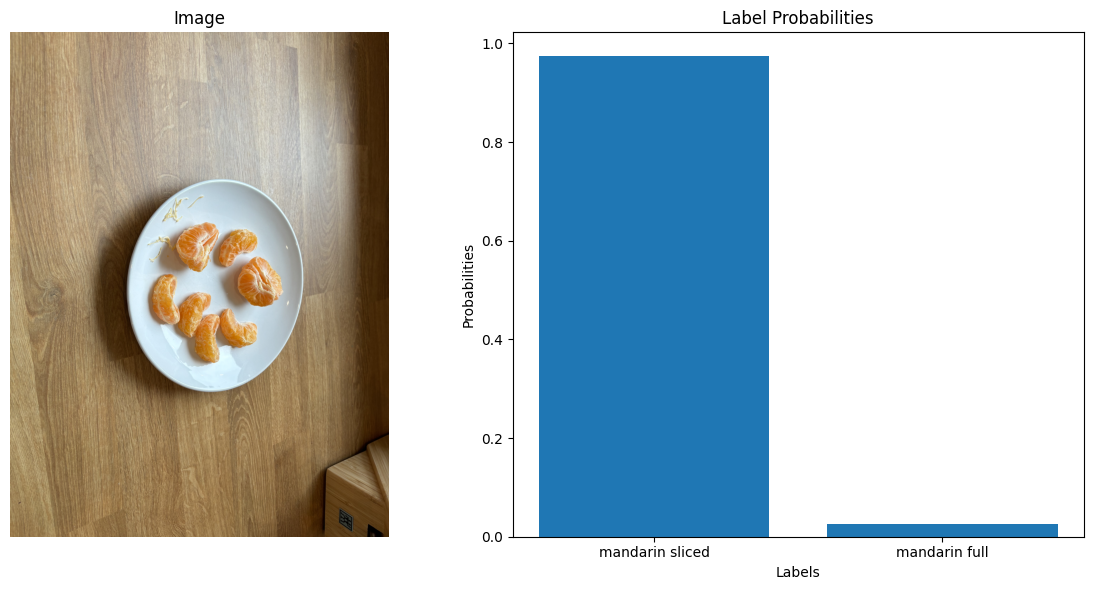

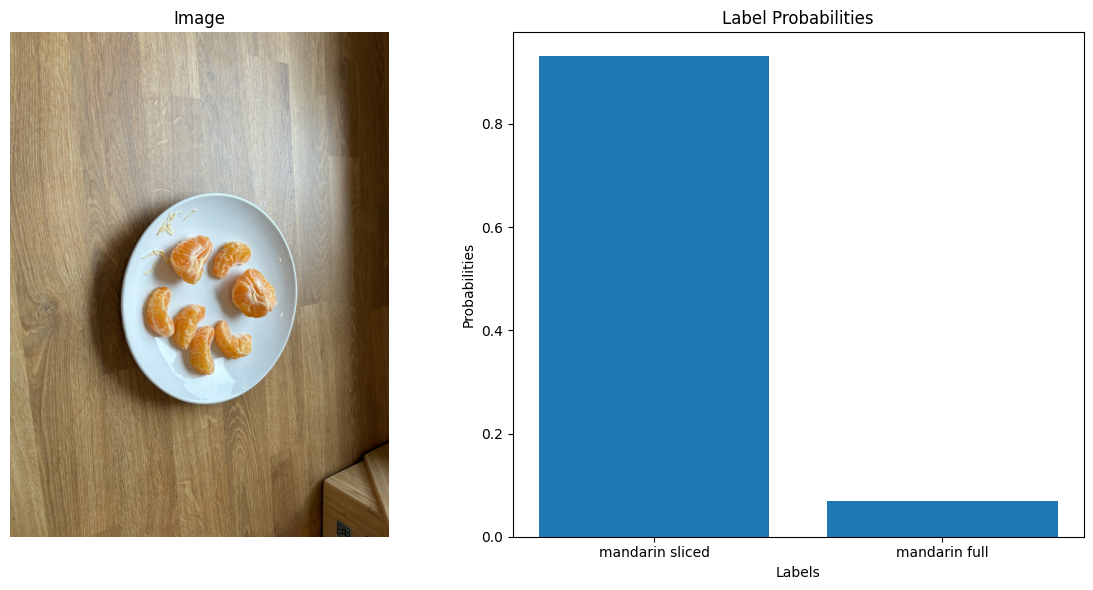

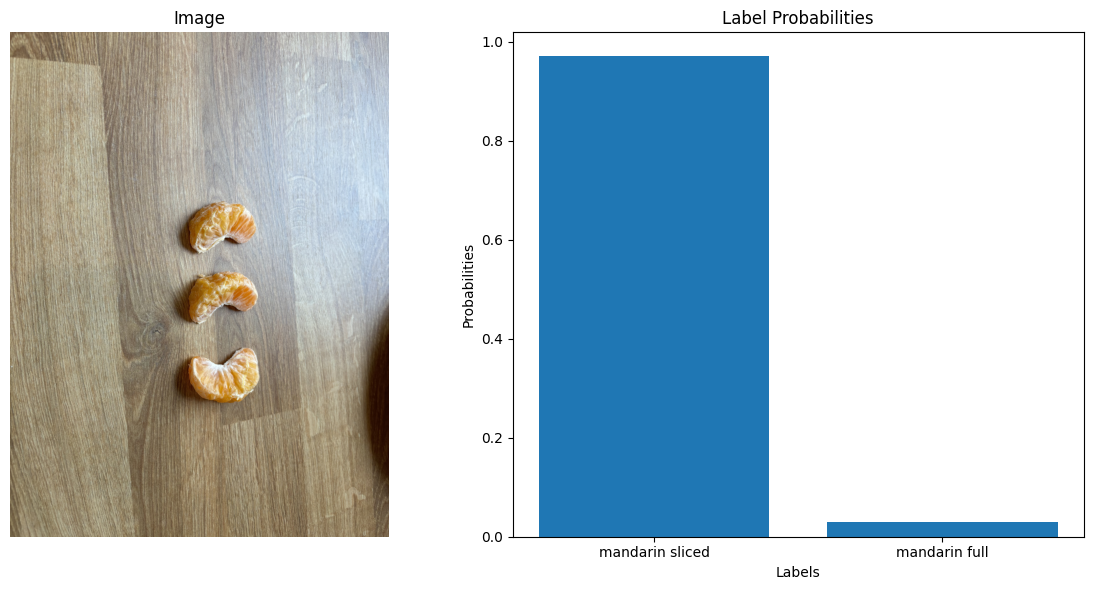

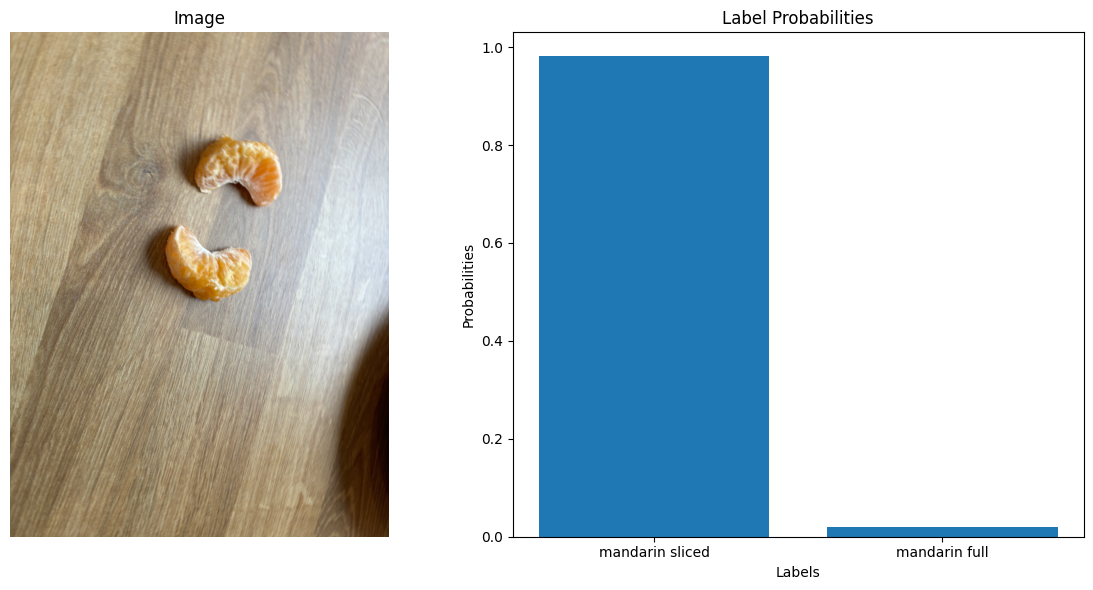

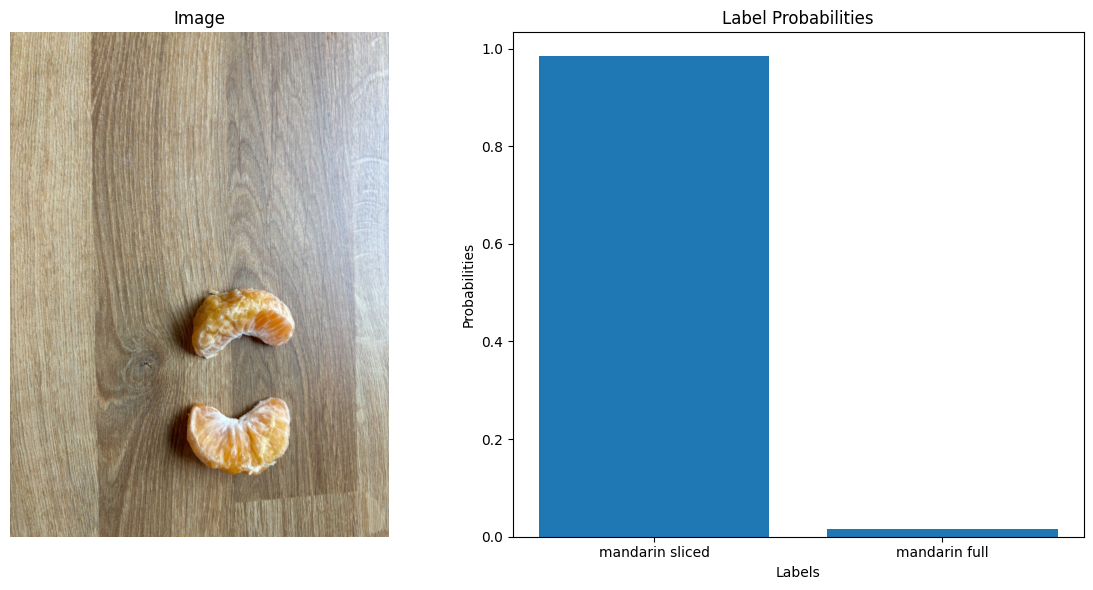

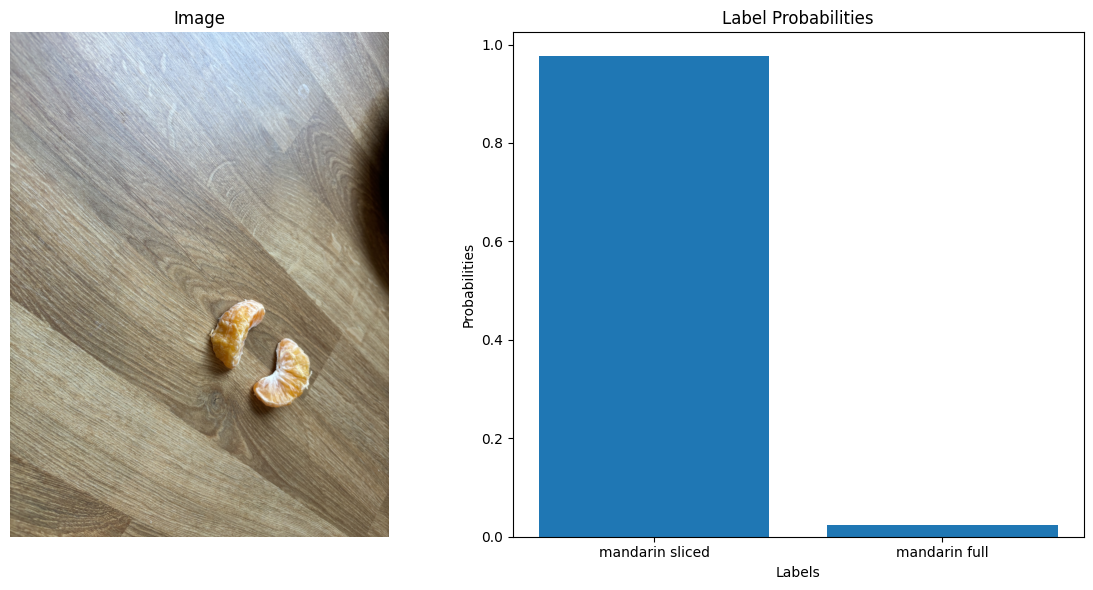

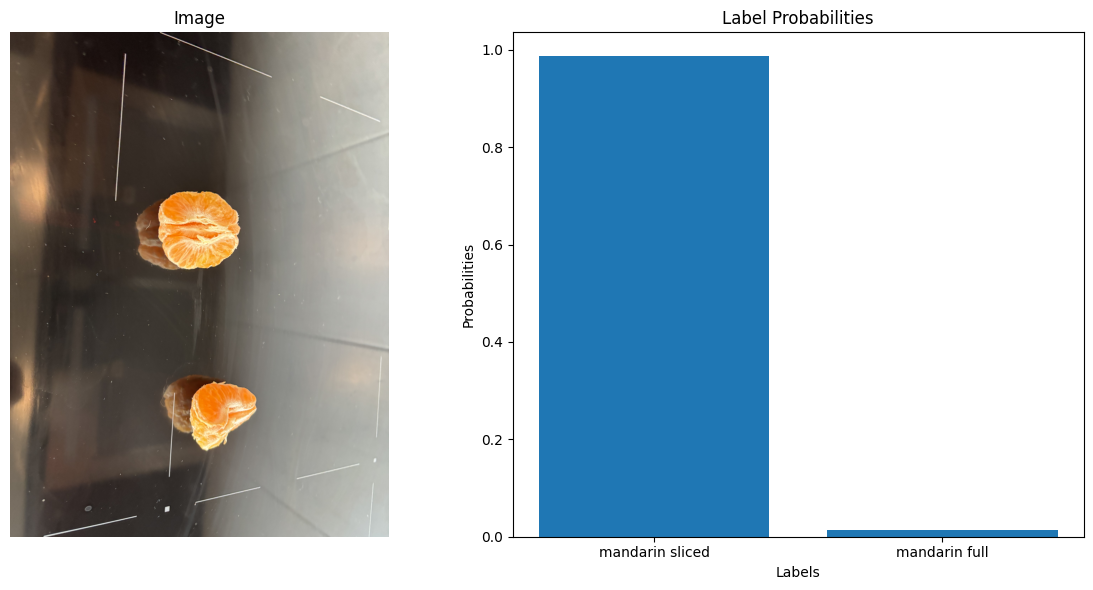

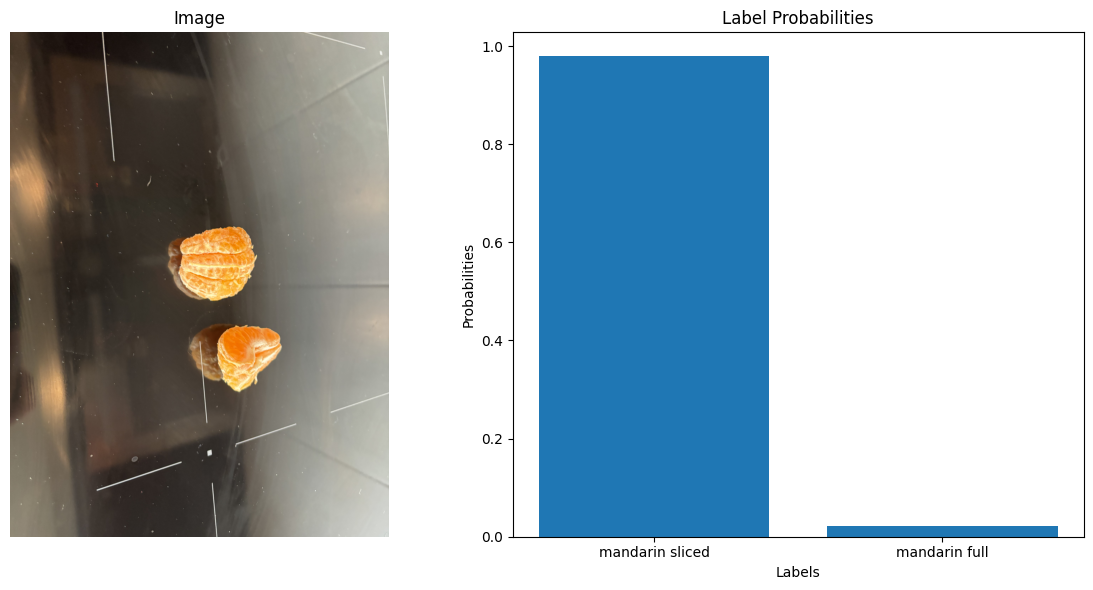

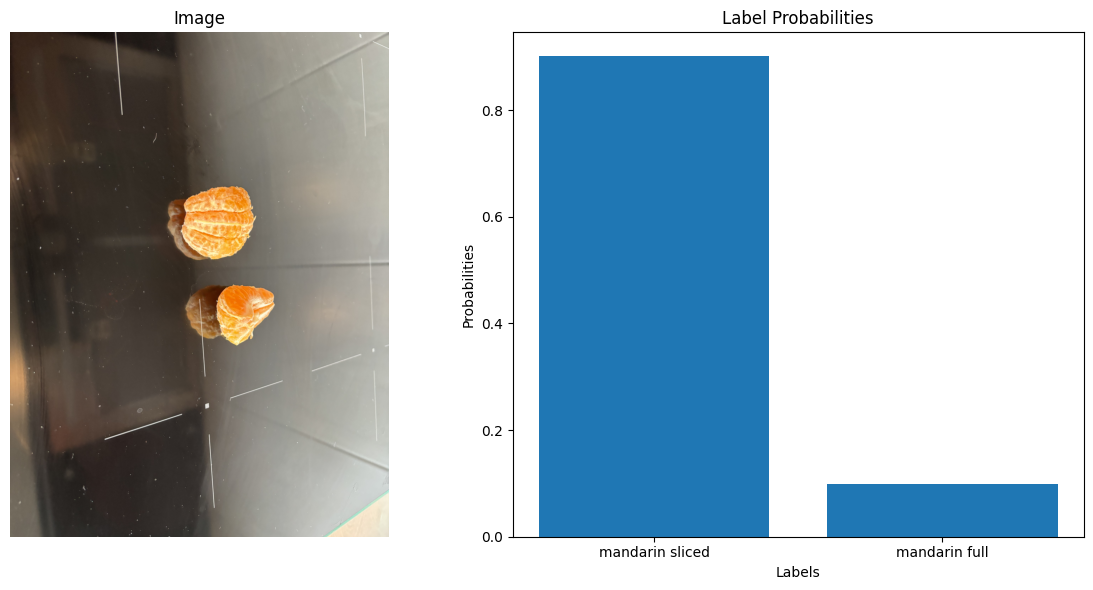

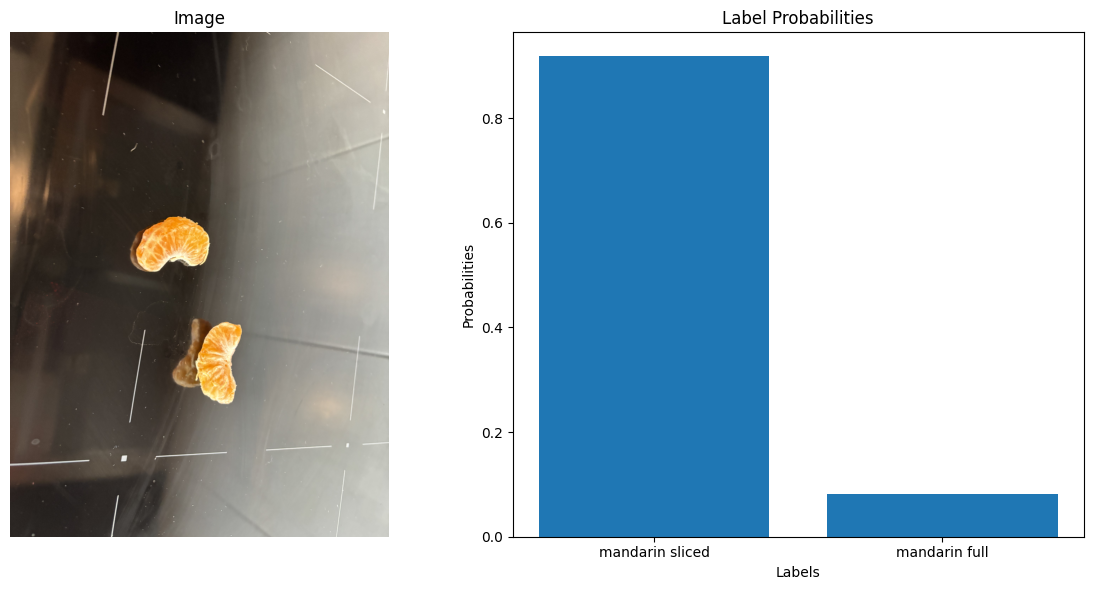

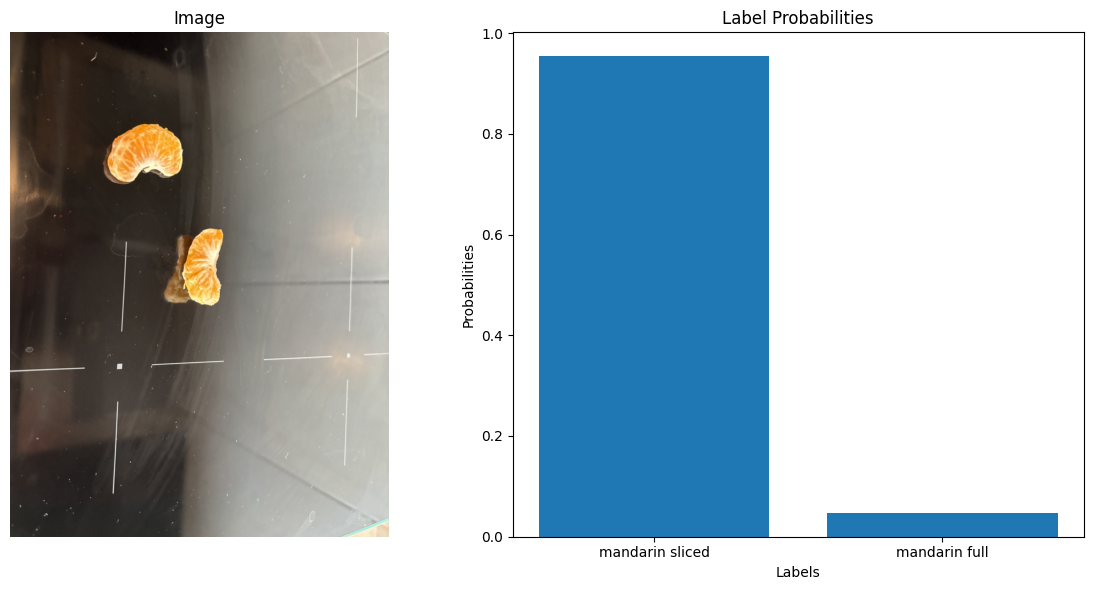

In [73]:
# Process each image in the folder
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image, text_probs = process_image(image_path)

    # Convert probabilities to numpy array for plotting
    probs = text_probs.cpu().numpy()

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plotting the image
    ax1.imshow(image)
    ax1.axis('off')
    ax1.set_title('Image')

    # Plotting the probabilities
    labels = ["mandarin sliced", "mandarin full"]
    ax2.bar(labels, probs.flatten())
    ax2.set_xlabel('Labels')
    ax2.set_ylabel('Probabilities')
    ax2.set_title('Label Probabilities')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()